## TF-IDF



### Vector Representation

- m개의 review 문서가 있다고 가정했을  때, review 문서 전체에 등장하는 단어의 수는 n개이다.

- 각 항목은 해당 단어가 review에 등장하는 빈도수를 의미한다.

   - (Review 1, Word 0) = 2 -> Review 1에 Word 0 은 2번 등장한다.

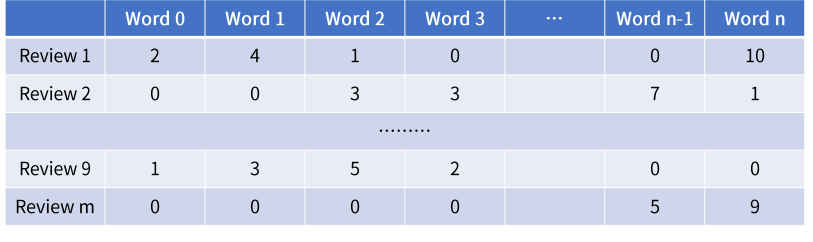

### Term Vector Representaion

**Term Weight**

- (i,j) = weight

- Term Frequency Vector: 단어의 빈도수로 벡터를 나타내고, 문서 i에서의 단어 j의 중요도

<br>

**TF-IDF**

- 흔하게 등장하는 단어는 중요하지 않다(조사,..등등)

- Information Retrieval에서 많이 사용하는 개념

- 각 단어에 가중치를 부여해서 Keyword extraction등에 활용

- 문서에서 특정 단어가 등장하는 것으로 문서끼리 관련있음을 표현할 수 있다


<br>

**TF-IDF식 설명**

- TF : 단어(Word) w가 문서 (Document)d에 등장한 빈도수
- DF: 단어(Word)w가 등장한 문서(Document) d의 수
- N: 전체 문서의 수

- TF(w,d) = 문서 내 단어 w의 수 / 문서 내 모든 단어의 수

- IDF(w) = log(전체 문서 수(N) / 단어w가 포함된 문서 수(DF(w))

- DF가 큰 단어는 정보력이 적다.

   - 문서 Corpus(말뭉치)에 모두 포함된 단어는 흔히 등장하는 단어로, 의미가 크지 않다.
   - 흔하게 등장하는 단어는 유사도 관계에서 제외하게 된다.
   - 대부분 문법적인 역할을 하는 조사,관사 등이 해당된다.
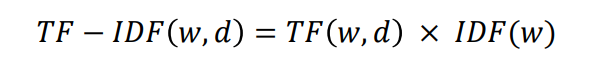

<br>

**정리**

- TF는 해당 단어가 해당 문서에 얼마나 자주 등장하는지 체크

- IDF는 해당 단어가 얼마나다른 문서에 비해 해당 문서에서 특별한지 체크
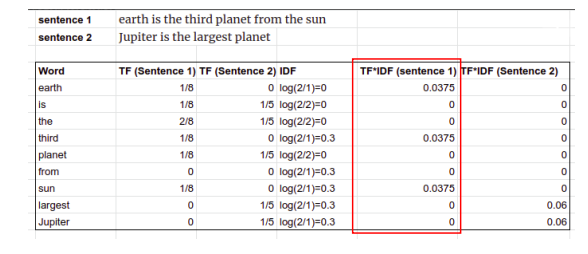


## 실습

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


- kss는 한국어 문장 분리 모듈로, 자세한 내용은 [링크](https://pypi.org/project/kss/)를 참고하세요.

In [ ]:
!pip install kss

  Created wheel for kss: filename=kss-1.3.1-cp36-cp36m-linux_x86_64.whl size=251539 sha256=a5df18ad77adad8f202eb5f7f518d8b20830cee045e1f812105a551195cdb2da
  Stored in directory: /root/.cache/pip/wheels/8b/98/d1/53f75f89925cd95779824778725ee3fa36e7aa55ed26ad54a8
Successfully built kss


In [ ]:
import os
import kss
import re

In [ ]:
# 형태소 기반 토크나이징 (Konlpy)
!python3 -m pip install konlpy
# mecab (ubuntu, mac 기준)
# 다른 os 설치 방법 및 자세한 내용은 다음 참고: https://konlpy.org/ko/latest/install/#id1
!bash <(curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh)

     |████████████████████████████████| 19.4MB 1.3MB/s 
     |████████████████████████████████| 92kB 6.6MB/s 
     |████████████████████████████████| 460kB 39.1MB/s 
  Found existing installation: tweepy 3.6.0
    Uninstalling tweepy-3.6.0:
      Successfully uninstalled tweepy-3.6.0
  Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3
Installing automake (A dependency for mecab-ko)
Get:1 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Hit:2 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:3 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:4 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease [21.3 kB]
Get:5 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Get:6 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Get:7 http://security.ubuntu.com/ubuntu bionic-security InRe

### Read dataset
- Github의 data 디렉토리에서 news_sample.txt 파일을 다운받아서 분석에 사용해주세요.

In [ ]:
removal_list =  "‘, ’, ◇, ‘, ”,  ’, ', ·, \“, ·, △, ●,  , ■, (, ), \", >>, `, /, -,∼,=,ㆍ<,>, .,?, !,【,】, …, ◆,%"

def cleansing_special(sentence):
    # 특수문자를 전처리를 하는 함수
    sentence = re.sub("[.,\'\"’‘”“!?]", "", sentence)
    sentence = re.sub("[^가-힣0-9a-zA-Z\\s]", " ", sentence)
    sentence = re.sub("\s+", " ", sentence)
    
    sentence = sentence.translate(str.maketrans(removal_list, ' '*len(removal_list)))
    sentence = sentence.strip()
    
    return sentence

def cleansing_numbers(sentence):
    # 숫자를 전처리(delexicalization) 하는 함수    
    sentence = re.sub('[0-9]+', 'NUM', sentence)
    sentence = re.sub('NUM\s+', "NUM", sentence)
    sentence = re.sub('[NUM]+', "NUM", sentence)
    
    return sentence


In [ ]:
from konlpy.tag import Mecab
mecab = Mecab()

In [ ]:
# 각자 작업 환경에 맞는 경로를 지정해주세요. Google Colab과 Jupyter환경에서 경로가 다를 수 있습니다.
data_path = '/content/drive/MyDrive/data'
all_sentences = []
with open(os.path.join(data_path, 'news_sample.txt'), 'r', encoding='utf-8') as f:
  for idx, line in enumerate(f.readlines()):
    print(f"--- 문서 {idx} 번 ---")
    preprocessed = cleansing_numbers(line)
    preprocessed = cleansing_special(preprocessed)
    # 명사만 추출하기
    preprocessed_news = ' '.join(list(set(mecab.nouns(preprocessed))))
    # 문장 분리해서 사용하는 방법
    # preprocessed_news = ' '.join(kss.split_sentences(preprocessed))
    print(preprocessed_news)
    all_sentences.append(preprocessed_news)

--- 문서 0 번 ---
출발 문제 미증유 날 흑인 동해 처음 경의선 발휘 청사진 사람 꿈 조화 변수 코드 파악 정상 기회비용 대비 도 활용 지혜 변화 화두 정부 좌절 가치 대결 공유 간 화해 관행 실행 건국 단계 단추 국익 고유 운행 등 역량 최대 구축 지 이것 갈등 바람 인원 번 현안 전환점 불신 의 방법 현상 자신 우리 대통령 단체장 목적 국민 경기 고난 당국 방향 평창 태양 직무 선거 금강산 올해 듯 협의 소망 관계 미래 극대 광채 동계 극복 어제 일 인맥 몫 후보 예산 나열 북 혼란 퇴행 행정 국호 시간 공직자 원년 자치 집행 추진 증오 무엇 열차 인구 도약 면적 인사 회생 당위 도전 생명력 표출 업그레이드 능력 구체 대화 기억 한뜻 과정 기축 점 외교 정책 국내 근거 미국 군 년 자생력 전력 평화 추진력 번지 유치 낭비성 정치 기 속 욕 새해 포함 떼 여건 쇠 단체 정과 그동안 적재적소 열쇠 희망 중단 암울 뒤 경제 다이 질주 다음 민 경협 약점 단절 폐쇄 슬기 개성관광 피 암투 기초자치단체 모색 해결 유능 회한 발전 이 민족 도시 부여 시대 올림픽 선진국 공감대 불씨 음모 조기 얼마 과제 논리 지역 사무소 달성 중요 정치력 배치 발굴 생산 기업 아침 한국 결정 청산 도정 동기 한반도 통일 위기 시련 책임 남북 휘하 것 틀 취임 오바마 핵 마음 바탕 시 개성 강원도 인재 때 땅 행정력 축년 짐 통행 자질 성과 후 저력 해다 기대 활력 역사 련 자본 햇살 한미 때문 글로벌 지방 성공 정립 정치색 유념 절망 지난해 기반 육 도민 남북한 바다 수 몸 성향
--- 문서 1 번 ---
메달 활동 발휘 시스템 삶 쾌거 서비스 엘리트 반영 꿈 조화 지금 현장 도 소통 정호원 육회 소외 내부 개정 체육 사항 김진선지사 간 보조 단계 마련 회장 복지 등 어깨 역량 구축 내실 갈등 부회장 난관 시기 체육관 정관 취약 방 애 김흥수 북경 선수 소년 이사 증원 인센티브 다사다난 도청 우리 단체장 걸 역할 연합회 경기 회의 건강 향상 출범 행복 체전 김용주 모두 최일선 

### Scikit-learn을 사용한 TF-IDF

- 한글자 단어 제외
- https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html
- Useful option: tokenizer, stop_words



In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import defaultdict

In [ ]:
print(len(all_sentences))

20


In [ ]:
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(all_sentences)

word2id = defaultdict(lambda : 0)
for idx, feature in enumerate(tfidf_vectorizer.get_feature_names()):
    word2id[feature] = idx

In [ ]:
tfidf_vectorizer.vocabulary_

In [ ]:
tfidf_matrix.shape

(20, 2630)

In [ ]:
with open(os.path.join(data_path, 'news_sample.txt'), 'r', encoding='utf-8') as f:
  for idx, line in enumerate(f.readlines()):
    print(f"--- 문서 {idx} 번 ---")
    print(line[:200])

--- 문서 0 번 ---
새로운 희망 공유하고 새 출발하자 기축년(己丑年) 새해다.새로운 희망을 공유하고 새 출발을 다짐할 때다.짙푸른 동해바다를 뚫고 이글거리는 광채를 뿜으며 힘차게 솟아오르는 태양을 안는다. 어제와 다른 이 아침의 햇살을 받으며 왜 간절한 소망이 없겠는가.지난날의 갈등과 혼란 회한을 뒤로하고 새로 일어서야 한다.올해는 불신과 증오, 암투와 음모, 좌절과 절망 등
--- 문서 1 번 ---
<새해 이렇게 하겠습니다>스포츠 "최일선 현장에서 진솔한 소리 듣겠다" 최동용 도체육회 사무처장 지도자와 선수 등 체육의 최일선 현장에서 진솔한 소리를 더 많이 듣겠다. 강원체육이 지금까지 잘 할 수 있었던 것은 운동장 체육관 등 현장에서 지도자와 선수들이 묵묵히 운동한 결과다. 애로사항 등을 청취 체육정책에 반영하는 소통의 역할에 충실하겠다. 도청·도교육
--- 문서 2 번 ---
<새해 이렇게 하겠습니다>경제 '저탄소 녹색성장' 도모 전수산 도상공회의소협의회장 강원경제는 경제성장에 필요한 입지여건이나 기반조성이 타 지역보다 열악하고 최근 세계경제 침체의 영향으로 많은 어려움을 겪고 있다. 그러나 최근 수도권과의 교통망이 확충되면서 중앙 및 지방정부의 지역전략산업 육성 등 유리한 발전여건을 갖춰 나가고 있다. 정부의 5+2광역경제권 
--- 문서 3 번 ---
<새해 이렇게 하겠습니다>문화 이대근 강원도문화원연합회장 “지속적 향토사 연구로 우리 역사 되살리겠다” 어김없이 새로운 한 해가 밝았다. 지난해는 많은 시련을 안겨줬다. 선진국의 문턱에서 넘지 못하고 머뭇거리며 지나온 10년 세월이 원망스러운 가운데 이번에는 미국발 경제한파가 발목을 잡고 있다. 우리나라는 국민소득에서 보면 전 세계에서 24번째 국가에 머물
--- 문서 4 번 ---
<새해 이렇게 하겠습니다>속초 고성 양양 ■속초시 환동해 수출입항 메카 거듭 의정 옴부즈맨 제도 활성화 채용생 속초시장은 “올해는 민선4기를 사실상 마무리 짓는 해로 지금까지 성과를 바탕으로 성실한 마무리와 함께 경제

In [ ]:
for idx, sent in enumerate(all_sentences):
    print(f"--- 문서 {idx} 번 ---")
    results = [(token, tfidf_matrix[idx, word2id[token]]) for token in sent.split()]
    results.sort(key = lambda element : element[1], reverse=True)
    print(results)
    print("\n")

--- 문서 0 번 ---
[('미증유', 0.08316005260563078), ('흑인', 0.08316005260563078), ('경의선', 0.08316005260563078), ('청사진', 0.08316005260563078), ('기회비용', 0.08316005260563078), ('화두', 0.08316005260563078), ('대결', 0.08316005260563078), ('화해', 0.08316005260563078), ('관행', 0.08316005260563078), ('건국', 0.08316005260563078), ('국익', 0.08316005260563078), ('운행', 0.08316005260563078), ('이것', 0.08316005260563078), ('전환점', 0.08316005260563078), ('불신', 0.08316005260563078), ('목적', 0.08316005260563078), ('당국', 0.08316005260563078), ('태양', 0.08316005260563078), ('직무', 0.08316005260563078), ('선거', 0.08316005260563078), ('소망', 0.08316005260563078), ('광채', 0.08316005260563078), ('어제', 0.08316005260563078), ('인맥', 0.08316005260563078), ('나열', 0.08316005260563078), ('혼란', 0.08316005260563078), ('퇴행', 0.08316005260563078), ('국호', 0.08316005260563078), ('공직자', 0.08316005260563078), ('증오', 0.08316005260563078), ('열차', 0.08316005260563078), ('당위', 0.08316005260563078), ('생명력', 0.08316005260563078), ('기억', 0.0831600526